In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-nov-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-nov-2021/train.csv
/kaggle/input/tabular-playground-series-nov-2021/test.csv


In [32]:
import os
import wandb
from wandb.keras import WandbCallback
os.system('! wandb login be213aaff4ff14945d480abc18697d8664bba8c8')
training = pd.read_csv('/kaggle/input/tabular-playground-series-nov-2021/train.csv')
test = pd.read_csv('/kaggle/input/tabular-playground-series-nov-2021/test.csv')
test['target'] = np.NaN
training['train_test'] = 1
test['train_test'] = 0
all_data = pd.concat([training,test]) 

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
attribute_names = all_data.columns.tolist()
test_atts = test.columns.tolist()
all_dummies = pd.get_dummies(all_data[attribute_names])
test_dummies = pd.get_dummies(test[test_atts])  
X_train = all_dummies[all_data.train_test == 1].drop(['train_test'], axis=1)
for column in X_train.columns:
    mean_value = X_train[column].mean()
    X_train[column].fillna(mean_value, inplace=True)
X_check = X_train #for heatmap
X_train = X_train.drop(['target'], axis=1)
X_backup = X_train
X_test = all_dummies[all_data.train_test == 0].drop(['train_test'], axis=1)
y_train = all_data[all_data.train_test==1].target
y_backup = y_train
X_test = X_test.drop(['target'], axis=1)
for column in X_test.columns:
    mean_value = X_test[column].mean()
    X_test[column].fillna(mean_value, inplace=True)

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [33]:
training

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f92,f93,f94,f95,f96,f97,f98,f99,target,train_test
0,0,0.106643,3.594370,132.8040,3.184280,0.081971,1.18859,3.732380,2.266270,2.099590,...,0.013331,-0.011715,0.052759,0.065400,4.211250,1.978770,0.085974,0.240496,0,1
1,1,0.125021,1.673360,76.5336,3.378250,0.099400,5.09366,1.275620,-0.471318,4.545940,...,0.017054,0.124863,0.154064,0.606848,-0.267928,2.577860,-0.020877,0.024719,0,1
2,2,0.036330,1.497470,233.5460,2.194350,0.026914,3.12694,5.056870,3.849460,1.801870,...,0.085222,0.032396,0.116092,-0.001688,-0.520069,2.141120,0.124464,0.148209,0,1
3,3,-0.014077,0.246000,779.9670,1.890640,0.006948,1.53112,2.698000,4.517330,4.503320,...,-0.017103,-0.008100,0.062013,0.041193,0.511657,1.968600,0.040017,0.044873,0,1
4,4,-0.003259,3.715420,156.1280,2.147720,0.018284,2.09859,4.154920,-0.038236,3.371450,...,-0.042943,0.105616,0.125072,0.037509,1.043790,1.074810,-0.012819,0.072798,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,599995,0.043008,1.640550,1375.8900,1.087030,0.839580,1.69362,3.843520,1.108250,1.505390,...,0.080317,0.017643,0.225133,0.073179,4.436510,1.739330,0.049038,0.065804,1,1
599996,599996,0.137048,4.826860,-99.6478,0.985289,0.037712,3.30370,2.471790,5.942130,0.875148,...,0.092457,0.081926,0.234041,0.041383,3.873990,1.870100,0.162313,0.085662,0,1
599997,599997,1.316220,0.502062,66.2360,2.233020,0.060038,3.77371,2.655340,3.155890,1.055020,...,0.032708,0.109668,0.027466,0.061931,-0.383329,0.922113,0.084864,0.052635,0,1
599998,599998,0.511918,3.827470,777.8720,0.285914,0.520157,2.76285,2.522200,1.561360,1.971140,...,0.070943,0.071452,-0.038071,0.038829,-0.122888,3.107790,0.061333,0.004179,1,1


In [34]:
all_data

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f92,f93,f94,f95,f96,f97,f98,f99,target,train_test
0,0,0.106643,3.59437,132.8040,3.184280,0.081971,1.188590,3.732380,2.266270,2.09959,...,0.013331,-0.011715,0.052759,0.065400,4.211250,1.97877,0.085974,0.240496,0.0,1
1,1,0.125021,1.67336,76.5336,3.378250,0.099400,5.093660,1.275620,-0.471318,4.54594,...,0.017054,0.124863,0.154064,0.606848,-0.267928,2.57786,-0.020877,0.024719,0.0,1
2,2,0.036330,1.49747,233.5460,2.194350,0.026914,3.126940,5.056870,3.849460,1.80187,...,0.085222,0.032396,0.116092,-0.001688,-0.520069,2.14112,0.124464,0.148209,0.0,1
3,3,-0.014077,0.24600,779.9670,1.890640,0.006948,1.531120,2.698000,4.517330,4.50332,...,-0.017103,-0.008100,0.062013,0.041193,0.511657,1.96860,0.040017,0.044873,0.0,1
4,4,-0.003259,3.71542,156.1280,2.147720,0.018284,2.098590,4.154920,-0.038236,3.37145,...,-0.042943,0.105616,0.125072,0.037509,1.043790,1.07481,-0.012819,0.072798,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539995,1139995,0.431599,1.50756,24.2698,2.928480,2.788830,5.152330,2.779980,0.816389,4.79156,...,0.132701,0.040109,0.121019,0.024841,3.182610,1.25273,0.059733,0.029033,NaN,0
539996,1139996,0.069713,2.35548,-128.7550,2.721580,1.256300,4.248220,2.014550,2.207120,3.02026,...,0.165319,0.065945,0.081351,-0.022179,4.512380,2.81288,0.016573,0.079498,NaN,0
539997,1139997,0.385075,2.52889,-63.9854,0.975396,0.043852,0.829423,2.014210,1.509500,2.02759,...,0.092720,0.067277,0.113736,0.132187,0.567747,-1.11285,0.776967,0.123728,NaN,0
539998,1139998,1.846240,3.41535,26.8476,-0.120134,0.027113,2.155160,2.529860,2.502250,3.45309,...,0.099288,0.043613,0.013528,0.078044,-0.337694,0.43673,0.054561,0.082622,NaN,0


In [35]:
X_train

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
0,0,0.106643,3.594370,132.8040,3.184280,0.081971,1.18859,3.732380,2.266270,2.099590,...,0.010739,1.098620,0.013331,-0.011715,0.052759,0.065400,4.211250,1.978770,0.085974,0.240496
1,1,0.125021,1.673360,76.5336,3.378250,0.099400,5.09366,1.275620,-0.471318,4.545940,...,0.135838,3.460170,0.017054,0.124863,0.154064,0.606848,-0.267928,2.577860,-0.020877,0.024719
2,2,0.036330,1.497470,233.5460,2.194350,0.026914,3.12694,5.056870,3.849460,1.801870,...,0.117310,4.883000,0.085222,0.032396,0.116092,-0.001688,-0.520069,2.141120,0.124464,0.148209
3,3,-0.014077,0.246000,779.9670,1.890640,0.006948,1.53112,2.698000,4.517330,4.503320,...,-0.015347,3.474390,-0.017103,-0.008100,0.062013,0.041193,0.511657,1.968600,0.040017,0.044873
4,4,-0.003259,3.715420,156.1280,2.147720,0.018284,2.09859,4.154920,-0.038236,3.371450,...,0.013781,1.910590,-0.042943,0.105616,0.125072,0.037509,1.043790,1.074810,-0.012819,0.072798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,599995,0.043008,1.640550,1375.8900,1.087030,0.839580,1.69362,3.843520,1.108250,1.505390,...,0.046537,1.552280,0.080317,0.017643,0.225133,0.073179,4.436510,1.739330,0.049038,0.065804
599996,599996,0.137048,4.826860,-99.6478,0.985289,0.037712,3.30370,2.471790,5.942130,0.875148,...,0.109293,1.345210,0.092457,0.081926,0.234041,0.041383,3.873990,1.870100,0.162313,0.085662
599997,599997,1.316220,0.502062,66.2360,2.233020,0.060038,3.77371,2.655340,3.155890,1.055020,...,0.117131,2.181150,0.032708,0.109668,0.027466,0.061931,-0.383329,0.922113,0.084864,0.052635
599998,599998,0.511918,3.827470,777.8720,0.285914,0.520157,2.76285,2.522200,1.561360,1.971140,...,0.072443,0.366702,0.070943,0.071452,-0.038071,0.038829,-0.122888,3.107790,0.061333,0.004179


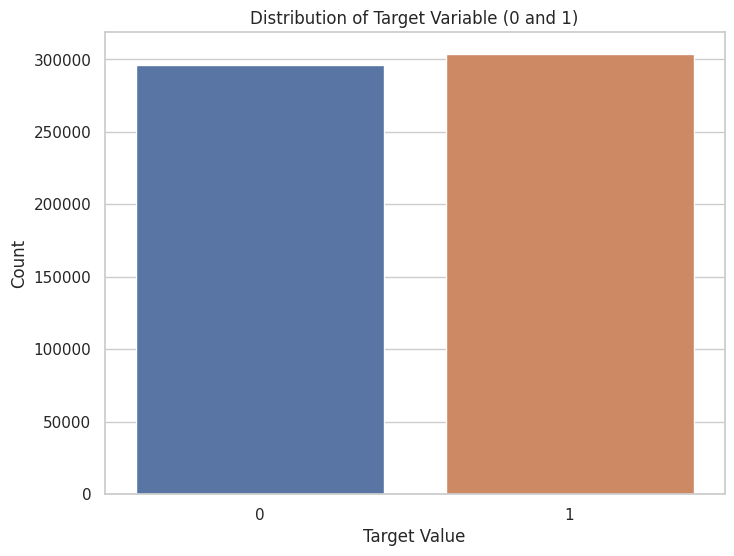

In [36]:
import matplotlib.pyplot as plt

# Load your data into a DataFrame, assuming your target variable is named 'target'
# Replace 'your_data.csv' with your actual data file path or source

# Create a countplot to visualize the distribution of the target variable
sns.set(style="whitegrid")  # Set the style of the plot

plt.figure(figsize=(8, 6))  # Set the figure size (width, height)
sns.countplot(data=training, x='target')  # Replace 'target' with your actual column name

# Customize the plot
plt.title('Distribution of Target Variable (0 and 1)')
plt.xlabel('Target Value')
plt.ylabel('Count')

# Show the plot
plt.show()
#even though it is a task about finding spam emails, the data is balanced

In [37]:
X_test

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
0,600000,0.003229,4.838660,585.5290,2.282910,0.713180,3.907830,0.480696,1.482270,4.891810,...,0.112910,1.073550,0.122149,0.086330,0.036010,0.010619,0.290343,1.898200,0.131533,0.012047
1,600001,0.008602,0.505536,-100.0990,3.012670,0.027199,1.194610,5.036620,2.517440,4.553890,...,-0.020214,2.622340,0.123307,0.033063,0.123059,0.005771,-0.392923,3.689640,0.047418,0.120015
2,600002,1.461000,2.437260,-112.9640,3.541230,0.752338,4.338310,1.648080,4.699910,1.950250,...,-0.011036,2.030180,-0.000426,0.084091,0.123605,0.499554,4.054650,3.330670,0.108843,0.064687
3,600003,0.140556,3.085610,179.4510,0.573945,0.057342,2.216790,1.623480,0.526174,1.542540,...,0.050117,0.221613,0.045298,0.129966,0.004015,0.018279,2.696580,-0.533491,0.052524,0.011058
4,600004,0.128876,5.199760,107.4660,-0.497149,0.080220,0.458121,0.629839,5.240460,-0.232279,...,0.058860,2.660430,0.135425,0.036481,0.093912,0.056315,1.110710,3.584470,0.145319,-0.050393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539995,1139995,0.431599,1.507560,24.2698,2.928480,2.788830,5.152330,2.779980,0.816389,4.791560,...,0.083219,2.545860,0.132701,0.040109,0.121019,0.024841,3.182610,1.252730,0.059733,0.029033
539996,1139996,0.069713,2.355480,-128.7550,2.721580,1.256300,4.248220,2.014550,2.207120,3.020260,...,0.077851,4.019700,0.165319,0.065945,0.081351,-0.022179,4.512380,2.812880,0.016573,0.079498
539997,1139997,0.385075,2.528890,-63.9854,0.975396,0.043852,0.829423,2.014210,1.509500,2.027590,...,0.060691,3.604950,0.092720,0.067277,0.113736,0.132187,0.567747,-1.112850,0.776967,0.123728
539998,1139998,1.846240,3.415350,26.8476,-0.120134,0.027113,2.155160,2.529860,2.502250,3.453090,...,-0.012514,0.122062,0.099288,0.043613,0.013528,0.078044,-0.337694,0.436730,0.054561,0.082622


In [38]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_adapt = X_train.drop(['id'], axis=1)
all_attributes =X_adapt.columns.tolist()
columns_to_normalize = all_attributes
scaler = MinMaxScaler()
X_train_scaled = X_train
X_train_scaled[columns_to_normalize] = scaler.fit_transform(X_train[columns_to_normalize])
#X_train_scaled = X_train_scaled[:,~np.all(np.isnan(d), axis=0)]
X_test_scaled = X_test
X_test_scaled[columns_to_normalize] = scaler.fit_transform(X_test[columns_to_normalize])

#also norm. backup
X_backup[columns_to_normalize] = scaler.fit_transform(X_backup[columns_to_normalize])

In [39]:
X_train_scaled

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
0,0,0.310367,0.646697,0.248101,0.577061,0.286635,0.306885,0.626685,0.470543,0.437860,...,0.362968,0.297285,0.346948,0.312845,0.269025,0.271991,0.739369,0.436958,0.276378,0.344739
1,1,0.311828,0.388867,0.241034,0.601646,0.288154,0.815037,0.305376,0.107503,0.758411,...,0.375281,0.600374,0.347080,0.322025,0.277665,0.381735,0.167980,0.517915,0.269139,0.320139
2,2,0.304777,0.365259,0.260754,0.451589,0.281835,0.559115,0.799909,0.680494,0.398849,...,0.373457,0.782985,0.349499,0.315810,0.274427,0.258393,0.135815,0.458897,0.278985,0.334218
3,3,0.300770,0.197292,0.329385,0.413095,0.280095,0.351457,0.491403,0.769062,0.752827,...,0.360400,0.602199,0.345867,0.313088,0.269815,0.267085,0.267428,0.435583,0.273264,0.322437
4,4,0.301630,0.662944,0.251031,0.445679,0.281083,0.425300,0.681947,0.164935,0.604515,...,0.363267,0.401496,0.344950,0.320731,0.275193,0.266338,0.335310,0.314801,0.269685,0.325621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,599995,0.305308,0.384463,0.404232,0.311240,0.352676,0.372602,0.641221,0.316974,0.360000,...,0.366491,0.355509,0.349325,0.314819,0.283727,0.273568,0.768105,0.404601,0.273875,0.324823
599996,599996,0.312784,0.812116,0.218905,0.298344,0.282777,0.582116,0.461818,0.958009,0.277418,...,0.372668,0.328933,0.349756,0.319139,0.284487,0.267124,0.696347,0.422273,0.281550,0.327087
599997,599997,0.406526,0.231660,0.239740,0.456491,0.284723,0.643277,0.485823,0.588518,0.300987,...,0.373440,0.436220,0.347635,0.321004,0.266868,0.271288,0.153259,0.294167,0.276303,0.323322
599998,599998,0.342586,0.677982,0.329121,0.209700,0.324832,0.511737,0.468411,0.377062,0.421029,...,0.369041,0.203348,0.348992,0.318435,0.261278,0.266606,0.186482,0.589527,0.274708,0.317798


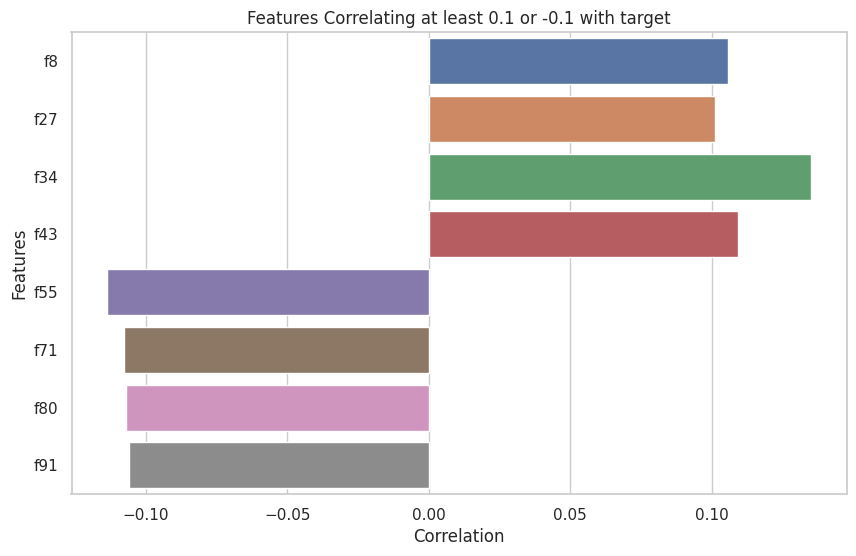

In [40]:
target_column = 'target'

# Calculate the correlations between the target and all features
correlations = training.corr()[target_column]
correlations = correlations.drop('target')
# Filter features with a correlation of at least 0.4 or -0.4
significant_features = correlations[(correlations >= 0.1) | (correlations <= -0.1)]
significant_features_index = correlations[(correlations >= 0.1) | (correlations <= -0.1)].index

# Visualize the correlation values
plt.figure(figsize=(10, 6))
sns.barplot(x=significant_features.values, y=significant_features.index)
plt.title(f'Features Correlating at least 0.1 or -0.1 with {target_column}')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()

In [41]:
print(significant_features_index)

Index(['f8', 'f27', 'f34', 'f43', 'f55', 'f71', 'f80', 'f91'], dtype='object')


In [42]:
X_train_sig = X_train_scaled[significant_features_index]
print(X_train_sig)

              f8       f27       f34       f43       f55       f71       f80  \
0       0.437860  0.383577  0.668653  0.304328  0.363233  0.677683  0.868182   
1       0.758411  0.347932  0.226292  0.584990  0.262885  0.559769  0.637855   
2       0.398849  0.398059  0.125291  0.110332  0.107788  0.266347  0.662589   
3       0.752827  0.372626  0.689068  0.253950  0.175985  0.584210  0.692141   
4       0.604515  0.376516  0.607420  0.515707  0.143854  0.451374  0.232362   
...          ...       ...       ...       ...       ...       ...       ...   
599995  0.360000  0.376446  0.148985  0.804967  0.102722  0.472427  0.295838   
599996  0.277418  0.388653  0.456161  0.120167  0.632949  0.779991  0.724463   
599997  0.300987  0.375381  0.318810  0.400547  0.652430  0.640074  0.426788   
599998  0.421029  0.397159  0.279071  0.404634  0.286598  0.424765  0.199129   
599999  0.318868  0.391909  0.788113  0.398251  0.333194  0.876951  0.187571   

             f91  
0       0.297285  
1

In [43]:
print(X_backup)

            id        f0        f1        f2        f3        f4        f5  \
0            0  0.310367  0.646697  0.248101  0.577061  0.286635  0.306885   
1            1  0.311828  0.388867  0.241034  0.601646  0.288154  0.815037   
2            2  0.304777  0.365259  0.260754  0.451589  0.281835  0.559115   
3            3  0.300770  0.197292  0.329385  0.413095  0.280095  0.351457   
4            4  0.301630  0.662944  0.251031  0.445679  0.281083  0.425300   
...        ...       ...       ...       ...       ...       ...       ...   
599995  599995  0.305308  0.384463  0.404232  0.311240  0.352676  0.372602   
599996  599996  0.312784  0.812116  0.218905  0.298344  0.282777  0.582116   
599997  599997  0.406526  0.231660  0.239740  0.456491  0.284723  0.643277   
599998  599998  0.342586  0.677982  0.329121  0.209700  0.324832  0.511737   
599999  599999  0.316147  0.628312  0.251592  0.591388  0.288449  0.398721   

              f6        f7        f8  ...       f90       f91  

In [44]:
'''sample_fraction = 0.1

num_samples = int(len(X_train_sig) * sample_fraction)
num_samples_2 = int(len(training) * 0.05)

X_train_sig.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

random_indices = np.random.choice(len(X_train_sig), num_samples, replace=False)
random_indices_2 = np.random.choice(len(training), num_samples_2, replace=False)

X_subset = X_train_sig.iloc[random_indices]
y_subset = y_train.iloc[random_indices]

X_backup = X_backup.iloc[random_indices_2]
y_backup = y_backup.iloc[random_indices_2]

X_val = X_train.iloc[random_indices]
y_val = y_train.iloc[random_indices]
'''

'sample_fraction = 0.1\n\nnum_samples = int(len(X_train_sig) * sample_fraction)\nnum_samples_2 = int(len(training) * 0.05)\n\nX_train_sig.reset_index(drop=True, inplace=True)\ny_train.reset_index(drop=True, inplace=True)\n\nrandom_indices = np.random.choice(len(X_train_sig), num_samples, replace=False)\nrandom_indices_2 = np.random.choice(len(training), num_samples_2, replace=False)\n\nX_subset = X_train_sig.iloc[random_indices]\ny_subset = y_train.iloc[random_indices]\n\nX_backup = X_backup.iloc[random_indices_2]\ny_backup = y_backup.iloc[random_indices_2]\n\nX_val = X_train.iloc[random_indices]\ny_val = y_train.iloc[random_indices]\n'

In [45]:
from sklearn.model_selection import train_test_split

# Split the data into training and temporary backup sets
X_train_temp, X_backup, y_train_sig, y_backup = train_test_split(X_train_sig, y_train, test_size=0.2, random_state=1)

# Split the backup set into a new validation set
X_val, X_backup, y_val, y_backup = train_test_split(X_train, y_train, test_size=0.07, random_state=1)

# Ensure that the indices are reset for each subset
X_train_sig = X_train_temp.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_backup = X_backup.reset_index(drop=True)
y_train = y_train_sig.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
y_backup = y_backup.reset_index(drop=True)

In [46]:
num_samples = int(len(X_train_sig) * 0.05)
random_indices = np.random.choice(len(X_train_sig), num_samples, replace=False)
X_subset = X_train_sig.iloc[random_indices]
y_subset = y_train.iloc[random_indices]

In [47]:
print(X_subset)
print(y_subset)

              f8       f27       f34       f43       f55       f71       f80  \
115724  0.616655  0.370387  0.620610  0.258691  0.398621  0.549575  0.483814   
473469  0.710385  0.400401  0.554419  0.649314  0.866070  0.746551  0.896232   
159540  0.372730  0.391637  0.688715  0.544410  0.680205  0.243657  0.577295   
474509  0.637964  0.405029  0.536194  0.640647  0.318120  0.682742  0.851822   
353284  0.667354  0.378002  0.773802  0.133966  0.747760  0.696606  0.239706   
...          ...       ...       ...       ...       ...       ...       ...   
176102  0.387193  0.397984  0.517448  0.512978  0.470057  0.742743  0.185742   
146594  0.885193  0.399493  0.557543  0.795340  0.239597  0.660087  0.793445   
267011  0.317539  0.384319  0.625092  0.213444  0.112926  0.577297  0.607155   
25637   0.512928  0.369558  0.236297  0.438851  0.535687  0.640315  0.490598   
113654  0.393446  0.410865  0.260381  0.714934  0.441934  0.235401  0.573239   

             f91  
115724  0.288227  
4

In [48]:
print(X_backup)

           id        f0        f1        f2        f3        f4        f5  \
0      555024  0.302666  0.389300  0.228377  0.332992  0.308258  0.352152   
1      236417  0.325616  0.320854  0.243638  0.669551  0.281150  0.262243   
2       91618  0.308212  0.700833  0.233725  0.404576  0.433169  0.652731   
3       53904  0.309862  0.768342  0.262606  0.292617  0.284760  0.135463   
4      350187  0.319403  0.868778  0.230022  0.855057  0.289139  0.359698   
...       ...       ...       ...       ...       ...       ...       ...   
41996  545032  0.406000  0.698520  0.225613  0.768137  0.288675  0.896430   
41997    7119  0.311110  0.487985  0.254344  0.886090  0.288003  0.355201   
41998   45661  0.312476  0.300402  0.254458  0.469832  0.287354  0.570168   
41999  568749  0.319517  0.187214  0.249451  0.373997  0.281271  0.695422   
42000  539883  0.308778  0.679989  0.234044  0.704743  0.279845  0.460399   

             f6        f7        f8  ...       f90       f91       f92  \
0

In [49]:
X_train_sig

,f8,f27,f34,f43,f55,f71,f80,f91
0,0.339052,0.403476,0.759547,0.667793,0.436060,0.573088,0.317558,0.199784
1,0.225233,0.387849,0.419435,0.491995,0.429549,0.200573,0.840884,0.798973
2,0.533856,0.380587,0.274080,0.226964,0.761510,0.288632,0.460619,0.249362
3,0.721535,0.392157,0.232605,0.097993,0.216467,0.558977,0.533476,0.525431
4,0.292293,0.424929,0.546394,0.771880,0.250137,0.302849,0.377552,0.404210
...,...,...,...,...,...,...,...,...
479995,0.630994,0.392164,0.410571,0.568721,0.302833,0.325776,0.703898,0.658248
479996,0.524025,0.376953,0.838424,0.551013,0.185384,0.251994,0.176332,0.127063
479997,0.774248,0.411895,0.280268,0.419805,0.576839,0.447655,0.370029,0.183229
479998,0.614172,0.385065,0.407586,0.231810,0.430319,0.461260,0.330534,0.687938


In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

'''wandb.init(project='KaggleVovember2021', name='untuned attemps')

def run_cross_validation(models, X_train, y_train, cv=5):
    results = []

    for model in models:
        model_name = model.__class__.__name__

        if model_name == 'XGBClassifier':
            class_counts = y_train.value_counts()
            class_weight = class_counts[0] / class_counts[1]
            model = XGBClassifier(scale_pos_weight=class_weight, random_state=1)
        
        cv_scores = cross_val_score(model, X_train, y_train, cv=cv)
        
        # Log the results to WandB:
        wandb.log({f'{model_name}_CV_Scores': cv_scores.tolist(), f'{model_name}_Mean_CV_Score': np.mean(cv_scores)})
        
        results.append({
            'model_name': model_name,
            'cv_scores': cv_scores,
            'mean_cv_score': np.mean(cv_scores),
            #'parameters': {
                #'scale_pos_weight': class_weight if model_name == 'XGBClassifier' else None
            #}
        })

    return results

xgb = XGBClassifier(random_state =1)

models = [
    xgb,
    GaussianNB(),
    LogisticRegression(max_iter=2000),
    RandomForestClassifier(random_state=1),
    GradientBoostingClassifier(random_state=1),
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=1),
    SVC(probability=True)
]

results = run_cross_validation(models, X_subset, y_subset, cv=5)
print(results)'''

"wandb.init(project='KaggleVovember2021', name='untuned attemps')\n\ndef run_cross_validation(models, X_train, y_train, cv=5):\n    results = []\n\n    for model in models:\n        model_name = model.__class__.__name__\n\n        if model_name == 'XGBClassifier':\n            class_counts = y_train.value_counts()\n            class_weight = class_counts[0] / class_counts[1]\n            model = XGBClassifier(scale_pos_weight=class_weight, random_state=1)\n        \n        cv_scores = cross_val_score(model, X_train, y_train, cv=cv)\n        \n        # Log the results to WandB:\n        wandb.log({f'{model_name}_CV_Scores': cv_scores.tolist(), f'{model_name}_Mean_CV_Score': np.mean(cv_scores)})\n        \n        results.append({\n            'model_name': model_name,\n            'cv_scores': cv_scores,\n            'mean_cv_score': np.mean(cv_scores),\n            #'parameters': {\n                #'scale_pos_weight': class_weight if model_name == 'XGBClassifier' else None\n        

In [51]:
'''results = [
    {'model_name': 'XGBClassifier', 'cv_scores': [0.61425, 0.6105, 0.61358333, 0.61016667, 0.61483333], 'mean_cv_score': 0.61267},
    {'model_name': 'GaussianNB', 'cv_scores': [0.63325, 0.62608333, 0.63175, 0.63225, 0.63616667], 'mean_cv_score': 0.6319},
    {'model_name': 'LogisticRegression', 'cv_scores': [0.63308333, 0.62625, 0.62925, 0.63233333, 0.635], 'mean_cv_score': 0.63118},
    {'model_name': 'RandomForestClassifier', 'cv_scores': [0.61175, 0.61183333, 0.613, 0.60966667, 0.61608333], 'mean_cv_score': 0.61247},
    {'model_name': 'GradientBoostingClassifier', 'cv_scores': [0.62625, 0.62375, 0.62791667, 0.62783333, 0.62983333], 'mean_cv_score': 0.62712},
    {'model_name': 'KNeighborsClassifier', 'cv_scores': [0.57091667, 0.56625, 0.566, 0.56675, 0.56666667], 'mean_cv_score': 0.56732},
    {'model_name': 'DecisionTreeClassifier', 'cv_scores': [0.53425, 0.54141667, 0.53958333, 0.53583333, 0.53825], 'mean_cv_score': 0.53787},
    {'model_name': 'SVC', 'cv_scores': [0.6285, 0.624, 0.62466667, 0.63075, 0.63091667], 'mean_cv_score': 0.62777}
]

df = pd.DataFrame(results)
print("We got this")
print(df)'''

'results = [\n    {\'model_name\': \'XGBClassifier\', \'cv_scores\': [0.61425, 0.6105, 0.61358333, 0.61016667, 0.61483333], \'mean_cv_score\': 0.61267},\n    {\'model_name\': \'GaussianNB\', \'cv_scores\': [0.63325, 0.62608333, 0.63175, 0.63225, 0.63616667], \'mean_cv_score\': 0.6319},\n    {\'model_name\': \'LogisticRegression\', \'cv_scores\': [0.63308333, 0.62625, 0.62925, 0.63233333, 0.635], \'mean_cv_score\': 0.63118},\n    {\'model_name\': \'RandomForestClassifier\', \'cv_scores\': [0.61175, 0.61183333, 0.613, 0.60966667, 0.61608333], \'mean_cv_score\': 0.61247},\n    {\'model_name\': \'GradientBoostingClassifier\', \'cv_scores\': [0.62625, 0.62375, 0.62791667, 0.62783333, 0.62983333], \'mean_cv_score\': 0.62712},\n    {\'model_name\': \'KNeighborsClassifier\', \'cv_scores\': [0.57091667, 0.56625, 0.566, 0.56675, 0.56666667], \'mean_cv_score\': 0.56732},\n    {\'model_name\': \'DecisionTreeClassifier\', \'cv_scores\': [0.53425, 0.54141667, 0.53958333, 0.53583333, 0.53825], \'mean

In [52]:
from sklearn.ensemble import VotingClassifier
xgb = XGBClassifier(random_state =1)
lr = LogisticRegression(max_iter=2000)
gnb = GaussianNB()
rf = RandomForestClassifier(random_state=1)
svc = SVC(probability=True)

voting_clf = VotingClassifier(estimators = [('lr',lr),
                                            ('gnb', gnb),
                                            ('rf', rf),
                                            ('svc',svc),
                                            ('xgb',xgb)], voting = 'soft')
print("voting classifier:")
#cv = cross_val_score(voting_clf,X_subset,y_subset,cv=5)
#print(cv)
#print(cv.mean())

voting classifier:


In [53]:
'''wandb.init(project='KaggleNovemer2021', name='initial untuned clf')

xgb_params = best_xgb.get_params()
#dt_params = best_dt.get_params()
dt_params = {
    'criterion': dt.criterion,
    'splitter': dt.splitter,
    'max_depth': dt.max_depth,
    # Add other hyperparameters as needed
}
#voting_clf_2_params = voting_clf_2.get_params()

from sklearn.metrics import roc_auc_score, roc_curve, auc


models = {
    "DecisionTree": {
        "model": best_dt,
        "params": dt_params
    },
    "XGBoost": {
        "model": best_xgb,
        "params": xgb_params
    },
    "VotingClassifier": {
        "model": voting_clf_2,
        "params": {"voting": "soft"}
    }
}
wandb.config.update(models)

for model_name, model_data in models.items():
    y_pred = model.predict_proba(X_subset)[:, 1]  

    fpr, tpr, _ = roc_curve(y_val, y_pred)
    auc_value = auc(fpr, tpr)

    wandb.log({"ROC-AUC Score": roc_auc_score(y_val, y_pred), "AUC": auc_value})
    
    wandb.save(model_name + ".pkl")  # Save the model if desired'''

'wandb.init(project=\'KaggleNovemer2021\', name=\'initial untuned clf\')\n\nxgb_params = best_xgb.get_params()\n#dt_params = best_dt.get_params()\ndt_params = {\n    \'criterion\': dt.criterion,\n    \'splitter\': dt.splitter,\n    \'max_depth\': dt.max_depth,\n    # Add other hyperparameters as needed\n}\n#voting_clf_2_params = voting_clf_2.get_params()\n\nfrom sklearn.metrics import roc_auc_score, roc_curve, auc\n\n\nmodels = {\n    "DecisionTree": {\n        "model": best_dt,\n        "params": dt_params\n    },\n    "XGBoost": {\n        "model": best_xgb,\n        "params": xgb_params\n    },\n    "VotingClassifier": {\n        "model": voting_clf_2,\n        "params": {"voting": "soft"}\n    }\n}\nwandb.config.update(models)\n\nfor model_name, model_data in models.items():\n    y_pred = model.predict_proba(X_subset)[:, 1]  \n\n    fpr, tpr, _ = roc_curve(y_val, y_pred)\n    auc_value = auc(fpr, tpr)\n\n    wandb.log({"ROC-AUC Score": roc_auc_score(y_val, y_pred), "AUC": auc_value

In [54]:
print("X_subset")
print(X_subset)
print("X_test")
print(X_test)
#print("X_sig")
#print(X_sig)
print("X_train_sig")
print(X_train_sig)
print("X_train_sig")

X_subset
              f8       f27       f34       f43       f55       f71       f80  \
115724  0.616655  0.370387  0.620610  0.258691  0.398621  0.549575  0.483814   
473469  0.710385  0.400401  0.554419  0.649314  0.866070  0.746551  0.896232   
159540  0.372730  0.391637  0.688715  0.544410  0.680205  0.243657  0.577295   
474509  0.637964  0.405029  0.536194  0.640647  0.318120  0.682742  0.851822   
353284  0.667354  0.378002  0.773802  0.133966  0.747760  0.696606  0.239706   
...          ...       ...       ...       ...       ...       ...       ...   
176102  0.387193  0.397984  0.517448  0.512978  0.470057  0.742743  0.185742   
146594  0.885193  0.399493  0.557543  0.795340  0.239597  0.660087  0.793445   
267011  0.317539  0.384319  0.625092  0.213444  0.112926  0.577297  0.607155   
25637   0.512928  0.369558  0.236297  0.438851  0.535687  0.640315  0.490598   
113654  0.393446  0.410865  0.260381  0.714934  0.441934  0.235401  0.573239   

             f91  
115724  0.2

In [55]:
voting_clf.fit(X_backup,y_backup)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=2000)),
                             ('gnb', GaussianNB()),
                             ('rf', RandomForestClassifier(random_state=1)),
                             ('svc', SVC(probability=True)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=1, ...))],
                 voting='soft')

In [56]:
y_hat_base_vc = voting_clf.predict(X_test_scaled).astype(float)
submission = {'id': test.id , 'target': y_hat_base_vc}
submission = pd.DataFrame(data=submission)
submission.to_csv('submission.csv', index=False)

In [57]:
wandb.init(project='KaggleNovemer2021', name='initial untuned clf')

lr.fit(X_backup,y_backup)
gnb.fit(X_backup,y_backup)
rf.fit(X_backup,y_backup)
svc.fit(X_backup,y_backup)
xgb.fit(X_backup,y_backup)
from sklearn.metrics import roc_auc_score, roc_curve, auc
# Define parameters for LR, GNB, RF, and SVC
xgb_params = xgb.get_params()
lr_params = lr.get_params()
gnb_params = gnb.get_params()
rf_params = rf.get_params()
svc_params = svc.get_params()



AUC (GaussianNB),▁
AUC (LogisticRegression),▁
AUC (RandomForest),▁
AUC (SVC),▁
AUC (VotingClassifier),▁
AUC (XGBoost),▁
ROC-AUC Score (GaussianNB),▁
ROC-AUC Score (LogisticRegression),▁
ROC-AUC Score (RandomForest),▁
ROC-AUC Score (SVC),▁
ROC-AUC Score (VotingClassifier),▁


In [58]:
# Create a dictionary of models and their respective parameters, including the Voting Classifier
models = {
    "XGBoost": {
        "model": xgb,
        "params": xgb_params
    },
    "LogisticRegression": {
        "model": lr,
        "params": lr_params
    },
    "GaussianNB": {
        "model": gnb,
        "params": gnb_params
    },
    "RandomForest": {
        "model": rf,
        "params": rf_params
    },
    "SVC": {
        "model": svc,
        "params": svc_params
    },
    "VotingClassifier": {
        "model": voting_clf,
        "params": {"voting": "soft"}
    }
}

# Update the WandB configuration with all models
wandb.config.update(models)

for model_name, model_data in models.items():
    y_pred = model_data["model"].predict_proba(X_val)[:, 1]

    fpr, tpr, _ = roc_curve(y_val, y_pred)
    auc_value = auc(fpr, tpr)

    wandb.log({"ROC-AUC Score ({})".format(model_name): roc_auc_score(y_val, y_pred), "AUC ({})".format(model_name): auc_value})

    wandb.save(model_name + ".pkl")  # Save the model if desired